## Тема “Обучение без учителя”

### Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = model.fit_transform(X_train_scaled)

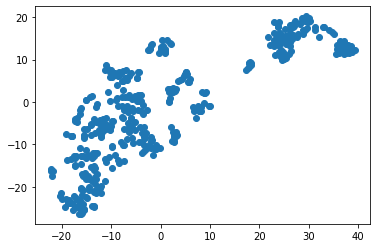

In [7]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Task 2

In [8]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [9]:
train_labels = model_kmeans.fit_predict(X_train)

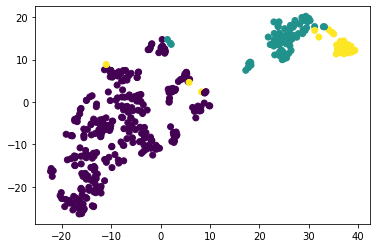

In [10]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)

In [11]:
X_with_labels = pd.concat([X_train_scaled, pd.DataFrame(train_labels, columns=["Label"])], axis=1)
print(X_with_labels.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  Label  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505      1  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474      0  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595      0  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387      2  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787      0  


In [12]:
price_df_train = pd.DataFrame(y_train, columns=["price"])
for i in range(0, 3): 
    is_current_cluster = X_with_labels['Label'] == i
    crim_mean = X_with_labels[is_current_cluster].CRIM.mean()
    print(f"Mean CRIM for cluster #{i} is { crim_mean: .2f}")
    price_mean = float(price_df_train.loc[is_current_cluster].mean())
    print(f"Mean price for cluster #{i} is { price_mean: .2f}")

Mean CRIM for cluster #0 is -0.36
Mean price for cluster #0 is  25.17
Mean CRIM for cluster #1 is  0.92
Mean price for cluster #1 is  17.44
Mean CRIM for cluster #2 is  1.21
Mean price for cluster #2 is  13.20


### Task 3

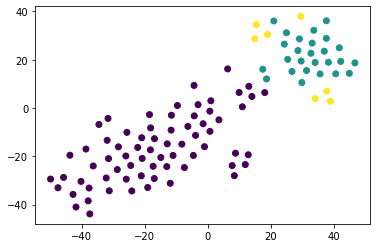

In [13]:
test_labels = model_kmeans.fit_predict(X_test)
X_test_tsne = model.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=test_labels)

In [14]:
X_test_with_labels = pd.concat([X_test_scaled, pd.DataFrame(test_labels, columns=["Label"])], axis=1)

price_df_test = pd.DataFrame(y_test, columns=["price"])
for i in range(0, 3): 
    is_current_cluster = X_test_with_labels['Label'] == i
    crim_mean = X_test_with_labels[is_current_cluster].CRIM.mean()
    print(f"Mean CRIM for cluster #{i} is { crim_mean: .2f}")
    price_mean = float(price_df_test.loc[is_current_cluster].mean())
    print(f"Mean price for cluster #{i} is { price_mean: .2f}")

Mean CRIM for cluster #0 is -0.46
Mean price for cluster #0 is  23.91
Mean CRIM for cluster #1 is  0.65
Mean price for cluster #1 is  17.39
Mean CRIM for cluster #2 is  2.07
Mean price for cluster #2 is  12.81
